# Neural Network Optimization

## Dependency

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

## Contents

- [Regularization](#regulatization)
- [Batch normalization](#batch-normalization)

## Regularization

Adding regularization to the cost function of neural network is,

$$
\mathcal{J}(W, b) = \frac{1}{m} \sum_{i = 1}^{m} \mathcal{L}(\hat{y}^{(i)}, y^{(i)}) + \frac{\lambda}{2m} \sum_{l = 1}^{L} \| W^{[l]} \|^2
$$

where

$$
\| W^{[l]} \|_{F}^2 = \sum_{i = 1}^{n^{[l]}} \sum_{j = 1}^{n^{[l - 1]}} (w_{i, j}^{[l]})^2
$$

Because we wanna minimize $\mathcal{J}$, if we set a large $\lambda$, $W$ will be close to 0, because otherwise, $\mathcal{J}$ won't be small.

We have double sums because $W$ is a **matrix** with weights, and its dimension is,

$$
W: (n^{[l]} \times n^{[l - 1]})
$$

So in one weight matrix, we square each element of weights and sum up to all the rows and columns directions to make it a single **scalar**. This $\| W^{[l]} \|_{F}^2$ is called **Frobenius norm**.

**Gradient descent** with regularization will be the following. First, we get derivative of cost function with respect to weight. $\alpha$ is a learning rate. $\lambda$ is a **regularization parameter** to control how much effective the regularization is. $m$ is the number of examples. Let $\text{backprops}$ be a sequence of partial derivatives obtained in **backward propagation**.

$$
\frac{\partial \mathcal{J}}{\partial W} = \text{backprops} + \frac{\lambda}{m} W
$$

So the gradient descent will be,

$$
W = W - \alpha \frac{\partial \mathcal{J}}{\partial W}
$$
$$
= W - \alpha \left[ \text{backprops} + \frac{\lambda}{m} W \right]
$$
$$
= W - \alpha \frac{\lambda}{m} W - \alpha \left[ \text{backprops} \right]
$$
$$
= (1 - \frac{\alpha \lambda}{m}) W - \alpha \left[ \text{backprops} \right]
$$

Typically $\frac{\alpha \lambda}{m} \ll 1$, so with the regularization parameter, it has an effect of making $W$ smaller, because subtracting some number from 1. It is the same effect as we see in the regularization in linear regression to make paramters small. Because of regularization, weights get smaller, so some people say it's **weight decay**. 

**Dropout** is another to introduce regularization by making a neural network small by randomly making some weights 0. 

In image recognition tasks, **data augmentation** can be used as regularization by adding noise, changing angles, zoom in/out and flipping, then we can add more challenging data or diverse data to training data.

## Normalization

After normalizing the input, the contour of the cost function will be more sphere than elongated ellipse shape, so the gradient descent will be more straight to the minimum. But in the elongated ellipse, the gradient descent is easy to offshoot and oscillate.

Notice that the same mean and variance used in the training data should be applied to the test data. No re-calculation of mean and variance from the test data.

## Weight Initialization

Vanishing/exploding gradients

He initialization for ReLU

Xavier initialization for tanh

**ESL** says that the weights initialized to be all 0s doesn't move the algorithm, because it gives 0 derivatives. So the weights should be initialized to be the random values. It means that activation functions outputs as an approximately linear model. So the neural network starts as nearly linear model and becomes nonlinear as the weights increase by training.

## Gradient Checking

**Grad check**

## Batch

Use **epoch** to describe passing through the entire training set.

**Batch gradient descent** uses the entire data per gradient descent. So 1 gradient descent per epoch.

**Mini-batch gradient descent** uses a part of all the data per gradient descent, so multiple gradient descents per epoch.

People use mini-batch gradient descent because it runs faster.

When mini-batch size is 1, it's called **stochastic gradient descent**.

When training set is huge, we should use mini-batch, but if the training set is small, we are fine to use batch gradient descent.

People believe that computers will run faster if we use the power of two, for example, $64 = 2^6$, $128 = 2^7$, $256 = 2^8$, $512 = s^9$.

## Exponentially Weighted Moving Average (Momentum)

$$
v_t = \beta v_{t - 1} + (1 - \beta) \theta_{t}
$$

Where

$$
\beta = 0.9
$$

$\theta_t$ is the actual data which will be turned into moving average.

$v_t$ as approximately average over $\approx \frac{1}{1 - \beta}$ number of data. For example, when $\beta = 0.9$

$$
\frac{1}{1 - 0.9} = \frac{1}{0.1} = 10
$$

So it's the average over the last 10 data. When $\beta = 0.98$

$$
\frac{1}{1 - 0.98} = \frac{1}{0.02} = 50
$$

- If $\beta$ is large, average over more data, moving average is smoother.
- If $\beta$ is small, average over less data, moving average is more spiky.

When $\beta = 0.9$

$$
v_3 = 0.9 v_2 + 0.1 \theta_3
$$
$$
v_2 = 0.9 v_1 + 0.1 \theta_2
$$
$$
v_1 = 0.9 v_0 + 0.1 \theta_1
$$

By substituting $v_2$ and $v_1$ into $v_3$ equation,

$$
v_3 = 0.9 (0.9 \times (0.9 v_0 + 0.1 \theta_1) + 0.1 \theta_2) + 0.1 \theta_3
$$
$$
= 0.9^3 v_0 + 0.9^2 \times 0.1 \theta_1 + 0.9 \times 0.1 \theta_2 + 0.1 \theta_3
$$

By rearranging,

$$
= 0.1 \theta_3 + 0.1 \times 0.9 \theta_2 + 0.1 \times 0.9^2 \theta_1 + 0.9^3 v_0
$$
$$
= 0.1 \times 0.9^0 \theta_3 + 0.1 \times 0.9^1 \theta_2 + 0.1 \times 0.9^2 \theta_1 + 0.9^3 v_0
$$

Because we choose $\beta \le 1$, if we take power of $\beta$, it will get smaller. So exponentially weighted moving average has the effect of putting more weight on the recent data (e.g. $\theta_3$) and less weight on the old data (e.g. $\theta_1$)

**Bias correction**. This is because the above uses $v_0 = 0$. The initial phase of moving average is small numbers. The correction uses $\frac{v_t}{1 - \beta^t}$. In practice, people don't do this, because the bias will be corrected after initial iterations.

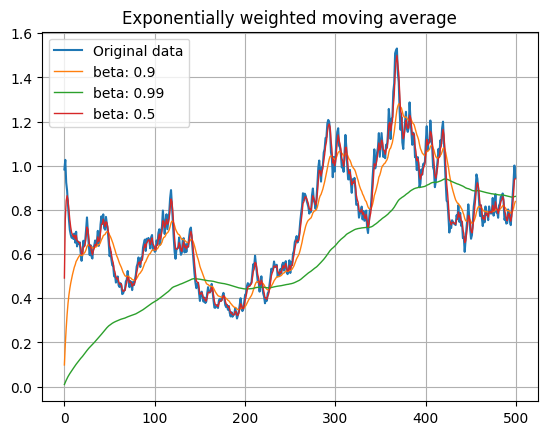

In [52]:
def exponentially_weighted_moving_average(beta, prev, curr):
    return beta * prev + (1 - beta) * curr


np.random.seed(1)
beta1 = 0.9
beta2 = 0.99
beta3 = 0.5
prev1 = 0
prev2 = 0
prev3 = 0
n = 500
d = 0.1
y = 1
ys = []
ma1s = []
ma2s = []
ma3s = []

for _ in range(n):
    
    # Generate random time series data
    delta = np.random.uniform(-d, d)
    y *= (1 + delta)
    ys.append(y)
    
    # Compute several exponentiall weighted moving averages
    ma1 = exponentially_weighted_moving_average(beta=beta1, prev=prev1, curr=y)
    ma1s.append(ma1)
    prev1 = ma1

    ma2 = exponentially_weighted_moving_average(beta=beta2, prev=prev2, curr=y)
    ma2s.append(ma2)
    prev2 = ma2

    ma3 = exponentially_weighted_moving_average(beta=beta3, prev=prev3, curr=y)
    ma3s.append(ma3)
    prev3 = ma3

plt.plot(ys, label='Original data')
plt.plot(ma1s, linewidth=1, label=f'beta: {beta1}')
plt.plot(ma2s, linewidth=1, label=f'beta: {beta2}')
plt.plot(ma3s, linewidth=1, label=f'beta: {beta3}')
plt.title('Exponentially weighted moving average')
plt.grid()
plt.legend()
plt.show()

By using mini-batch gradient descent, optimization will oscillate because of the random chance of the mini-batch sample of the training set. Smoothing this oscillation make the learning faster. Oscillation appears because the gradients oscillate. So the idea is to apply the exponetially weighted moving average to the noisy gradients. This approach is called **gradient descent with momentum**.

In a basic form, $\alpha$ is learning rate, we have,

$$
W = W - \alpha \frac{\partial \mathcal{J}}{\partial W}
$$

But in gradient descent with momentum, after getting derivative, we first apply exponentially weighted moving average to gradients to get the average gradients, and then do gradient descent with the average gradient.

$$
v_{\frac{\partial \mathcal{J}}{\partial W}_{t}} = \beta v_{\frac{\partial \mathcal{J}}{\partial W}_{t - 1}} + (1 - \beta) \frac{\partial \mathcal{J}}{\partial W}_t
$$
$$
W = W - \alpha v_{\frac{\partial \mathcal{J}}{\partial W}_{t}}
$$

Typical choice for $\beta$ is 0.9, the average of the last 10 gradients.

Apply the same approach to $\frac{\partial \mathcal{J}}{\partial b}$. Initialize $v_{\frac{\partial \mathcal{J}}{\partial W}_0} = 0$, and $v_{\frac{\partial \mathcal{J}}{\partial b}_0} = 0$

## Root Mean Square Prop (RMSprop)

The goal of RMSprop is to reduce the oscillation of mini-batch gradient descent. Use $\frac{\partial \mathcal{J}}{\partial W}^2$ and $\frac{\partial \mathcal{J}}{\partial b}^2$ for element-wise squares of the partial derivative of the cost function with respect to parameters.

$$
s_{\frac{\partial \mathcal{J}}{\partial W}} = \beta s_{\frac{\partial \mathcal{J}}{\partial W}} + (1 - \beta) \frac{\partial \mathcal{J}}{\partial W}^2
$$
$$
W = W - \alpha \frac{\frac{\partial \mathcal{J}}{\partial W}}{\sqrt{s_{\frac{\partial \mathcal{J}}{\partial W}}} + \epsilon}
$$

And apply the same to $b$. $\epsilon$ is added for numerical stability. When denominator gets close to 0, the division doesn't work. So the above equation means that,

$$
\frac{\partial \mathcal{J}}{\partial W} \uparrow \quad \rightarrow \quad s_{\frac{\partial \mathcal{J}}{\partial W}} \uparrow \quad \rightarrow \quad \frac{\frac{\partial \mathcal{J}}{\partial W}}{\sqrt{s_{\frac{\partial \mathcal{J}}{\partial W}}} + \epsilon} \downarrow
$$

The division gets small, because the denominator gets large. When a gradient is too large, we see the oscillation of gradient descent, and it might diverge. But the RMSprop will reduce the oscillation. When a gradient is too small, it won't affect the gradient descent so much originally, but RMSprop will give us a bigger effect on gradient descent, because the opposite will happen.

## Adaptive Moment Estimation (Adam)

**Adaptive moment estimation (Adam)** takes **momentum** and **RMSprop**, and puts them together. Notice that it uses different $\beta_1$ and $\beta_2$ for each.

First computing exponentially weight moving average,

$$
v_{\frac{\partial \mathcal{J}}{\partial W}} = \beta_1 v_{\frac{\partial \mathcal{J}}{\partial W}} + (1 - \beta_1) \frac{\partial \mathcal{J}}{\partial W}
$$

Then computing RMSprop, 

$$
s_{\frac{\partial \mathcal{J}}{\partial W}} = \beta_2 s_{\frac{\partial \mathcal{J}}{\partial W}} + (1 - \beta_2) \frac{\partial \mathcal{J}}{\partial W}^2
$$

Applying bias correction to both,

$$
v_{\frac{\partial \mathcal{J}}{\partial W}}^{\text{corrected}} = \frac{v_{\frac{\partial \mathcal{J}}{\partial W}}}{1 - \beta_1^t}
$$
$$
s_{\frac{\partial \mathcal{J}}{\partial W}}^{\text{corrected}} = \frac{s_{\frac{\partial \mathcal{J}}{\partial W}}}{1 - \beta_2^t}
$$

Finally doing gradient descent by using the both outputs,

$$
W = W - \alpha \frac{v_{\frac{\partial \mathcal{J}}{\partial W}}^{\text{corrected}}}{\sqrt{s_{\frac{\partial \mathcal{J}}{\partial W}}^{\text{corrected}}} + \epsilon}
$$

$t$ is for the $t$th iteration. Apply all the above same steps to $b$.

So Adam optimization algorithm has 3 parameters; $\alpha$, $\beta_1$, $\beta_2$. 

- $\alpha$ will be found by hyperparameter tuning
- $\beta_1$ uses 0.9 for the default choice
- $\beta_2$ uses 0.999 for the default choise

## Learning Rate Decay

xxx

## Batch Normalization

$z^{[l]}$ has dimension $(n^{[l]} \times 1)$. $n^{[l]}$ is the number of units in a layer $l$. $z^{(i)}$ is each element in $z^{[l]}$. Batch normalization is to normalize the output of each layer $z^{[l]}$ by the following. $m$ is the number of data in a mini-batch. $n$ is the number of units in the layer.

$$
\mu = \frac{1}{m} \sum_{i = 1}^{n} z^{(i)}
$$
$$
\sigma^2 = \frac{1}{m} \sum_{i = 1}^{n} (z^{(i)} - \mu)^2
$$
$$
z^{(i)}_{\text{norm}} = \frac{z^{(i)} - \mu}{\sqrt{\sigma^2 + \epsilon}}
$$
$$
\tilde{z^{(i)}} = \gamma z^{(i)}_{\text{norm}} + \beta 
$$

Notice that the way batch normalization does is first to set mean zero and standardize variance, and then to rescale it by $\gamma$ and $\beta$. $\gamma$ and $\beta$ are not the hyperparameters, but the **parameters optimized during training**. So training will apply **gradient descent** to $\gamma$ and $\beta$. And this $\beta$ is different from $\beta$ in **Adam**. When the gradient descent uses **mini-batch gradient descent**, $\mu$ and $\sigma$ are computed from the mini-batch data each time.

$$
Z^{[l]} = W^{[l]} A^{[l - 1]} + b^{[l]}
$$
$$
\downarrow
$$
$$
\tilde{Z^{[l]}} = \gamma^{[l]} Z^{[l]} + \beta^{[l]}
$$
$$
\downarrow
$$
$$
A^{[l]} = g^{[l]}(\tilde{Z^{[l]}})
$$

Then $\beta$ and $\gamma$ are updated by,

$$
\beta = \beta - \alpha \frac{\partial \mathcal{J}}{\partial \beta}
$$
$$
\gamma = \gamma - \alpha \frac{\partial \mathcal{J}}{\partial \gamma}
$$

The goal is to train parameters faster and to make it easier to train a deeper network.

There's a debate whether normalizing before or after the activation functions. Default is before activation function, so normalizing $Z^{[l]} = W^{[l]} A^{[l - 1]} + b^{[l]}$ 